# Reading Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('car_race.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.00,6.00,MANUAL,rear wheel drive,2.00,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,Luxury,Compact,Convertible,28,18,3916,34500


# Some Cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.columns=df.columns.str.lower()
for col in df.columns:
    print(col,' :',df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n',"*"*20,'\n')

make  : 48
make
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: count, dtype: int64

 ******************** 

model  : 915
model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: count, dtype: int64

 ******************** 

year  : 28
year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: count, dtype: int64

 ******************** 

engine fuel type  : 10
engine fuel type
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: count, dtype: int64

 ******************** 

engine hp  : 356
engine hp
200.00    456
170.00    351
210.00    320
240.00    268
285.00    246
Name: count, dtype: int64

 ******************** 

engine cylinders  : 9
engine cylinders
4.00     4752
6.00     4489
8.00 

In [ ]:
df.columns=df.columns.str.replace(' ','_')
categorical_column=df.select_dtypes('object').columns
for col in categorical_column:
    df[col]=df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis (EDA)

Understanding the data is a critical step in the machine learning process. Before training any model, we need to assess the dataset to determine its structure and suitability. The primary goals of EDA include:

<details>
<summary>1. Distribution of the Target Variable</summary>

- **Objective**: Analyze the target variable to understand its distribution.
- **Importance**: This helps in selecting the right modeling technique and assessing the balance in the dataset.

</details>

<details>
<summary>2. Features in the Dataset</summary>

- **Objective**: Identify and describe the features (columns) in the dataset.
- **Importance**: Understanding the features aids in feature selection and engineering.

</details>

<details>
<summary>3. Distribution of Values in Features</summary>

- **Objective**: Examine the distribution of values in each feature.
- **Importance**: Helps in detecting skewed distributions, outliers, and the need for transformations.

</details>

<details>
<summary>4. Quality of the Data</summary>

- **Objective**: Assess the overall quality of the data, including the presence of errors, outliers, and inconsistencies.
- **Importance**: Data quality issues need to be addressed before proceeding to modeling.

</details>

<details>
<summary>5. Number of Missing Values</summary>

- **Objective**: Quantify and analyze missing data in the dataset.
- **Importance**: Missing data needs to be handled appropriately, whether by imputation, removal, or other methods.

</details>

In [ ]:
pd.options.display.float_format='{:,.2f}'.format
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


In [ ]:
df.rename(columns = {'msrp': 'price'}, inplace = True)
df.describe(include='O')

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


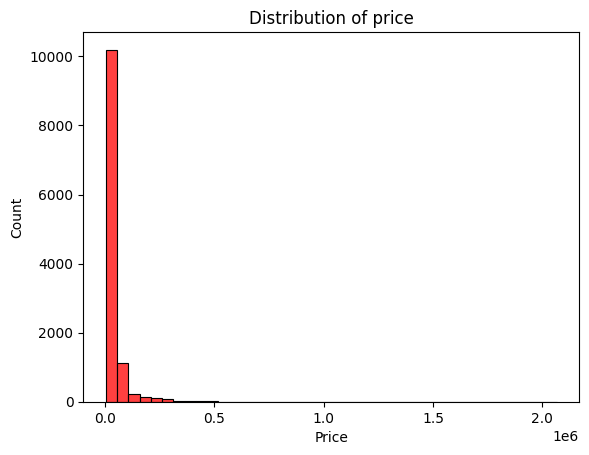

In [ ]:
sns.histplot(df['price'],bins=40,color='red')
plt.title("Distribution of price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


The histogram shows a strong right skew. There are many cars with low prices on the left side, but the number quickly drops, and
there’s a long tail of very few cars with high prices

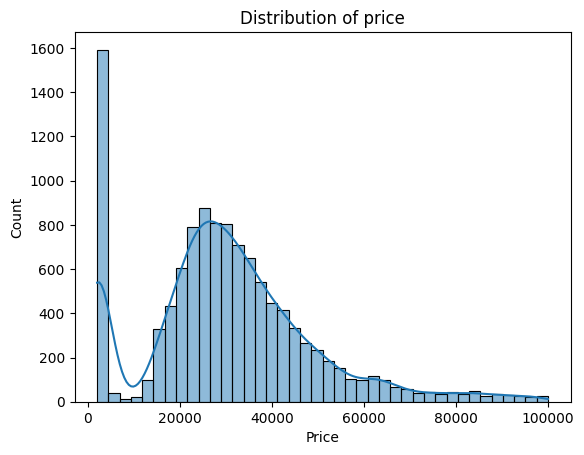

In [ ]:
sns.histplot(df.price[df['price']<100000],bins=40,kde=True)
plt.title("Distribution of price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


# Log Transformation
### To address the skewness in the price distribution, a log transformation was applied.

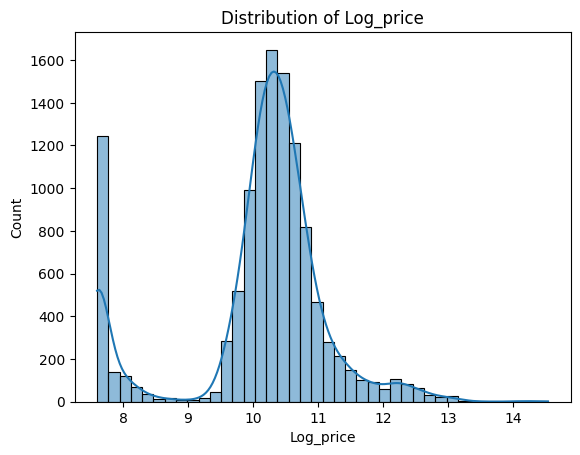

In [ ]:
df['log_price']=np.log1p(df.price)
sns.histplot(df['log_price'],bins=40,kde=True)
plt.title("Distribution of Log_price")
plt.xlabel("Log_price")
plt.ylabel("Count")
plt.show()

To address this skewness, we applied a log transformation.

In [ ]:
df.price.skew()

11.771987129334972

In [ ]:
df.log_price.skew()

-0.9178678067039072

# Checking Missing Values

In [ ]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


# handle numerical missing values using  KNN imputation

In [ ]:
from sklearn.impute import KNNImputer

df_numerical=df.select_dtypes(exclude='O')
df_numerical.drop(columns='number_of_doors',inplace=True)
knn= KNNImputer(n_neighbors=5)
df_imputed= knn.fit_transform(df_numerical)
df_imputed=pd.DataFrame(df_imputed,columns=df_numerical.columns)
df= pd.concat([df_imputed,df.select_dtypes(include='O'),df['number_of_doors']],axis=1)
df.isna().sum()


,0
year,0
engine_hp,0
engine_cylinders,0
highway_mpg,0
city_mpg,0
popularity,0
price,0
log_price,0
make,0
model,0


# Handling Categorical Missing Values

In [ ]:
df['market_category'] = df['market_category'].fillna('Unknown')
mode_value = df['engine_fuel_type'].mode()[0]
df['engine_fuel_type'] = df['engine_fuel_type'].fillna(mode_value)
mode_value = df['number_of_doors'].mode()[0]
df['number_of_doors'] = df['number_of_doors'].fillna(mode_value)
df.isna().sum()

,0
year,0
engine_hp,0
engine_cylinders,0
highway_mpg,0
city_mpg,0
popularity,0
price,0
log_price,0
make,0
model,0


# Split data to 60% train,20% test,20% valdation

In [ ]:
from sklearn.model_selection import train_test_split

df_train,df_temp=train_test_split(df,test_size=0.4,random_state=7)
df_test,df_val=train_test_split(df_temp,test_size=0.5,random_state=7)

In [ ]:
print(f"Training set shape: {df_train.shape}")
print(f"Testing set shape: {df_test.shape}")
print(f"Validation set shape: {df_val.shape}")

Training set shape: (7148, 17)
Testing set shape: (2383, 17)
Validation set shape: (2383, 17)


In [ ]:
y_train=df_train['log_price'].values
y_val=df_val['log_price'].values
y_test=df_test['log_price'].values

# seprate data to numerical and categorical

In [ ]:
df_train_numerical=df_train.select_dtypes(exclude='O')
df_train_numerical.drop(columns='number_of_doors',inplace=True)
df_train_categorical=df_train.select_dtypes(include='O')
df_train_categorical= pd.concat([df_train_categorical,df_train['number_of_doors']],axis=1)
df_train_numerical.head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,price,log_price
2810,"2,016.00",305.00,6.00,26.00,18.00,"1,385.00","29,440.00",10.29
5523,"2,012.00",166.00,4.00,25.00,19.00,481.00,"23,749.00",10.08
11055,"2,017.00",310.00,8.00,19.00,15.00,"2,031.00","30,020.00",10.31
6254,"1,993.00",73.00,3.00,33.00,28.00,640.00,"2,000.00",7.60
7338,"2,015.00",175.00,4.00,33.00,25.00,640.00,"27,295.00",10.21


In [ ]:
df_train_categorical.head()

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style,number_of_doors
2810,chevrolet,colorado,regular_unleaded,automatic,rear_wheel_drive,diesel,compact,crew_cab_pickup,4.00
5523,suzuki,grand_vitara,regular_unleaded,automatic,rear_wheel_drive,crossover,compact,4dr_suv,4.00
11055,toyota,tundra,regular_unleaded,automatic,rear_wheel_drive,Unknown,large,extended_cab_pickup,4.00
6254,subaru,justy,regular_unleaded,manual,front_wheel_drive,hatchback,compact,2dr_hatchback,2.00
7338,subaru,outback,regular_unleaded,automatic,all_wheel_drive,crossover,midsize,4dr_suv,4.00


# base solution

In [ ]:
def normal_equation(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    W= np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return W[0],W[1:]


## training model

In [ ]:
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
X_train=df_train[base]
w0,W=normal_equation(X_train,y_train)
print('w0: ',w0)
print('W:',W)

w0:  7.784739347009653
W: [ 9.05297793e-03 -1.27421429e-01  4.79668206e-02 -2.36361242e-02
 -1.04152625e-05]


In [ ]:
def linear_reg(X,W,b):
    Y=b+X.dot(W)
    return Y

In [ ]:
Y_train=linear_reg(X_train,W,w0)

result = pd.DataFrame({
    'y': y_train,
    'y_predict': Y_train
})
result.reset_index().drop(columns='index')

,y,y_predict
0,10.29,10.59
1,10.08,9.52
2,10.31,10.11
3,7.60,8.98
4,10.21,9.84
...,...,...
7143,10.55,10.71
7144,10.42,9.84
7145,10.40,10.27
7146,8.55,10.19


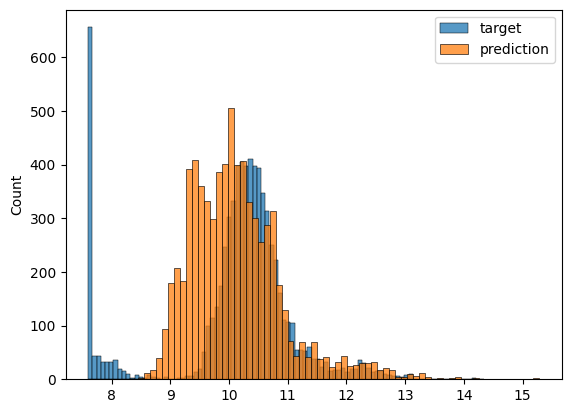

In [ ]:
sns.histplot(y_train,label='target')
sns.histplot(Y_train,label='prediction')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

def Score(y,Y_predict):
    MSE = mean_squared_error(y, Y_predict)
    RMSE = np.sqrt(MSE)

    r2=r2_score(y,Y_predict)
    print('mean square error: ',MSE)
    print('root mean square error: ',RMSE)
    print('r2_score: ',r2)

In [ ]:
Score(y_train, Y_train)

mean square error:  0.5482222967938976
root mean square error:  0.7404203514179615
r2_score:  0.5446572683861135


## predict validation

In [ ]:
X_val= df_val[base]
Y_val=linear_reg(X_val,W,w0)

result = pd.DataFrame({
    'y': y_val,
    'y_predict': Y_val
})
result.reset_index().drop(columns='index')

,y,y_predict
0,9.72,9.42
1,10.66,10.25
2,10.43,10.70
3,10.65,10.31
4,10.28,9.96
...,...,...
2378,11.05,10.97
2379,10.35,10.02
2380,10.14,9.62
2381,10.30,10.52


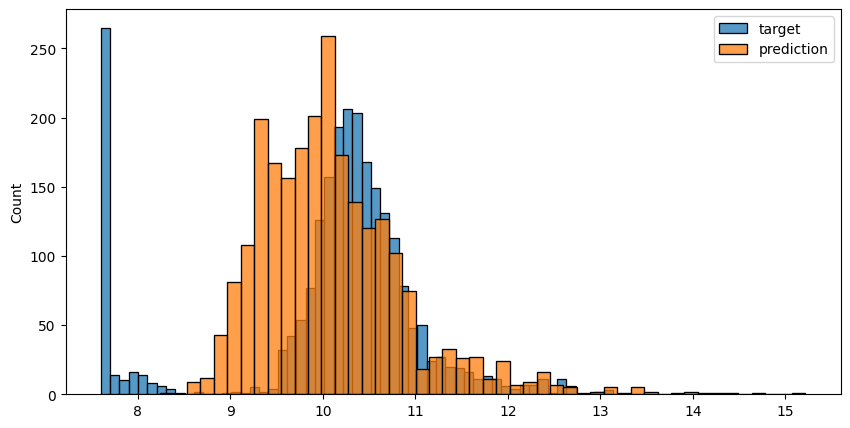

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_val,label='target')
sns.histplot(Y_val,label='prediction')
plt.legend()

In [ ]:
Score(y_val, Y_val)

mean square error:  0.60731062689466
root mean square error:  0.779301371033479
r2_score:  0.502004853841244


# adding more features

we will add age feature by subtracting the year when the car was out from 2017,because the dataset was created in 2017

In [ ]:
def add_age_feature(df):
    df=df.copy()
    features=base.copy()
    features.append('age')

    df['age']= 2017 - df['year']
    X=df[features]
    return X

In [ ]:
X_train_2=add_age_feature(df_train)
X_train_2

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,age
2810,305.00,6.00,26.00,18.00,"1,385.00",1.00
5523,166.00,4.00,25.00,19.00,481.00,5.00
11055,310.00,8.00,19.00,15.00,"2,031.00",0.00
6254,73.00,3.00,33.00,28.00,640.00,24.00
7338,175.00,4.00,33.00,25.00,640.00,2.00
...,...,...,...,...,...,...
4307,325.00,6.00,24.00,17.00,190.00,4.00
5699,239.00,5.00,18.00,14.00,130.00,7.00
10742,281.00,6.00,23.00,16.00,"1,385.00",2.00
537,315.00,8.00,19.00,14.00,617.00,24.00


In [ ]:
w0,W=normal_equation(X_train_2,y_train)
X_val_2=add_age_feature(df_val)
Y_train_2=linear_reg(X_train_2,W,w0)
Y_val_2=linear_reg(X_val_2,W,w0)
Score(y_train,Y_train_2)

mean square error:  0.2582171653577858
root mean square error:  0.5081507309428825
r2_score:  0.7855298660575791


In [ ]:
Score(y_val,Y_val_2)

mean square error:  0.2559901875576355
root mean square error:  0.5059547287629946
r2_score:  0.790087864064193


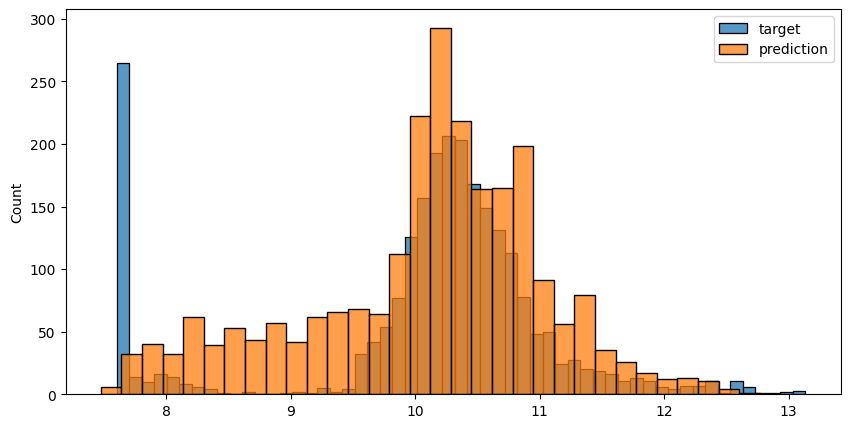

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_val,label='target')
sns.histplot(Y_val_2,label='prediction')
plt.legend()

now we used all numerical feature but what about categrical

# Handling categorical variables

In [ ]:
for col in df_train_categorical.columns:
    print(col,' :',df_train_categorical[col].nunique())

make  : 47
model  : 870
engine_fuel_type  : 10
transmission_type  : 5
driven_wheels  : 4
market_category  : 68
vehicle_size  : 3
vehicle_style  : 16
number_of_doors  : 3


for categoric data that have atmost 5 unique value we will use **get_demmies** and use **Target Encoding** for categroy with greater than 5

In [ ]:
def prepare_categoric_data(df):

    encoding_df= pd.get_dummies(df,columns=['number_of_doors','vehicle_size','driven_wheels','transmission_type'])

    target_mean = df.groupby('make')['price'].mean()
    encoding_df['make'] = df['make'].map(target_mean)

    target_mean = df.groupby('model')['price'].mean()
    encoding_df['model'] = df['model'].map(target_mean)

    target_mean = df.groupby('engine_fuel_type')['price'].mean()
    encoding_df['engine_fuel_type'] = df['engine_fuel_type'].map(target_mean)

    target_mean = df.groupby('market_category')['price'].mean()
    encoding_df['market_category'] = df['market_category'].map(target_mean)

    target_mean = df.groupby('vehicle_style')['price'].mean()
    encoding_df['vehicle_style'] = df['vehicle_style'].map(target_mean)


    encoding_df['age']= 2017 - encoding_df['year']
    encoding_df.drop(columns=['year','price','log_price'],inplace=True)

    encoding_df=encoding_df.astype(float)
    return encoding_df


# training with all features

In [ ]:
X_encoding_train=prepare_categoric_data(df_train)
X_encoding_val=prepare_categoric_data(df_val)
X_encoding_test=prepare_categoric_data(df_test)
X_encoding_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2383 entries, 2872 to 5660
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   engine_hp                           2383 non-null   float64
 1   engine_cylinders                    2383 non-null   float64
 2   highway_mpg                         2383 non-null   float64
 3   city_mpg                            2383 non-null   float64
 4   popularity                          2383 non-null   float64
 5   make                                2383 non-null   float64
 6   model                               2383 non-null   float64
 7   engine_fuel_type                    2383 non-null   float64
 8   market_category                     2383 non-null   float64
 9   vehicle_style                       2383 non-null   float64
 10  number_of_doors_2.0                 2383 non-null   float64
 11  number_of_doors_3.0                 2383 non-

In [ ]:
w0,W=normal_equation(X_encoding_train,y_train)
Y_train_3=linear_reg(X_encoding_train,W,w0)
Y_val_3=linear_reg(X_encoding_val,W,w0)

#### train score

In [ ]:
Score(y_train,Y_train_3)

mean square error:  40645.299229037846
root mean square error:  201.60679360834507
r2_score:  -33758.19163895617


#### validation score

In [ ]:
Score(y_val,Y_val_3)

mean square error:  43510.67711016493
root mean square error:  208.5921309881198
r2_score:  -35677.786188441634


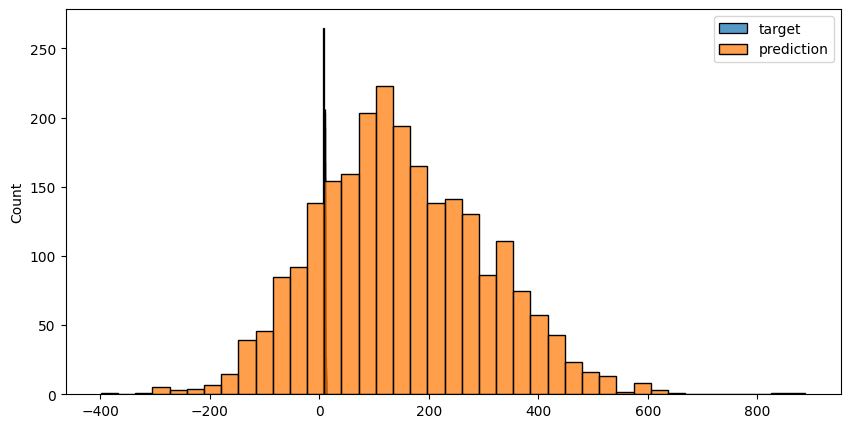

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_val,label='target')
sns.histplot(Y_val_3,label='prediction')
plt.legend()

We saw that adding new features does not always help, and in our case, it made things a lot worse.

#  Regularization

In [ ]:
def normal_equation_regularization(X,y,r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    W= np.linalg.inv(XTX+reg).dot(X.T).dot(y)
    return W[0],W[1:]

In [ ]:
w0,W=normal_equation_regularization(X_encoding_train,y_train,0.001)
Y_train_3_reg=linear_reg(X_encoding_train,W,w0)
Y_val_3_reg=linear_reg(X_encoding_val,W,w0)
Y_test_3_reg=linear_reg(X_encoding_test,W,w0)

#### training score

In [ ]:
Score(y_train,Y_train_3_reg)

mean square error:  0.1770346637834146
root mean square error:  0.4207548737488546
r2_score:  0.8529584661752792


#### validation score

In [ ]:
Score(y_val,Y_val_3_reg)

mean square error:  0.17911763588865073
root mean square error:  0.42322291512706484
r2_score:  0.8531234111280397


#### test score

In [ ]:
Score(y_test,Y_test_3_reg)

mean square error:  0.2106744023119277
root mean square error:  0.45899281291968796
r2_score:  0.835298230671691


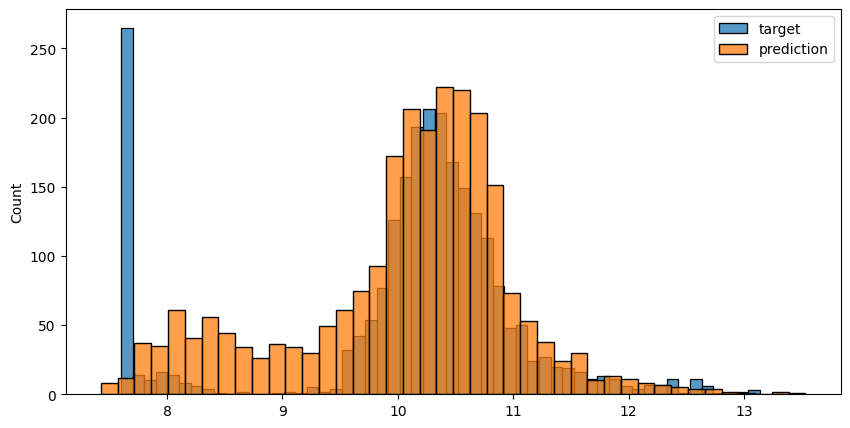

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y_val,label='target')
sns.histplot(Y_val_3_reg,label='prediction')
plt.legend()

# compare between models

In [ ]:
def get_score(y,Y_predict):
    MSE = mean_squared_error(y, Y_predict)
    RMSE = np.sqrt(MSE)

    r2=r2_score(y,Y_predict)
    return MSE,RMSE,r2

In [ ]:
mse_base_train, rmse_base_train, r2_base_train = get_score(y_train, Y_train)
mse_base_val, rmse_base_val, r2_base_val = get_score(y_val, Y_val)

mse_ext_train, rmse_ext_train, r2_ext_train = get_score(y_train, Y_train_2)
mse_ext_val, rmse_ext_val, r2_ext_val = get_score(y_val, Y_val_2)

mse_all_feat_train, rmse_all_feat_train, r2_all_feat_train = get_score(y_train, Y_train_3)
mse_all_feat_val, rmse_all_feat_val, r2_all_feat_val = get_score(y_val, Y_val_3)

mse_reg_train, rmse_reg_train, r2_reg_train = get_score(y_train, Y_train_3_reg)
mse_reg_val, rmse_reg_val, r2_reg_val = get_score(y_val, Y_val_3_reg)

data = [
    {"Model": "Base Model Training", "MSE": mse_base_train, "RMSE": rmse_base_train, "R2": r2_base_train},
    {"Model": "Base Model Validation", "MSE": mse_base_val, "RMSE": rmse_base_val, "R2": r2_base_val},
    {"Model": "Extended Model with Age Feature Training", "MSE": mse_ext_train, "RMSE": rmse_ext_train, "R2": r2_ext_train},
    {"Model": "Extended Model with Age Feature Validation", "MSE": mse_ext_val, "RMSE": rmse_ext_val, "R2": r2_ext_val},
    {"Model": "All Features Model Training", "MSE": mse_all_feat_train, "RMSE": rmse_all_feat_train, "R2": r2_all_feat_train},
    {"Model": "All Features Model Validation", "MSE": mse_all_feat_val, "RMSE": rmse_all_feat_val, "R2": r2_all_feat_val},
    {"Model": "Regularized Model Training", "MSE": mse_reg_train, "RMSE": rmse_reg_train, "R2": r2_reg_train},
    {"Model": "Regularized Model Validation", "MSE": mse_reg_val, "RMSE": rmse_reg_val, "R2": r2_reg_val}
]

results_df = pd.DataFrame(data)
results_df

,Model,MSE,RMSE,R2
0,Base Model Training,0.55,0.74,0.54
1,Base Model Validation,0.61,0.78,0.50
2,Extended Model with Age Feature Training,0.26,0.51,0.79
3,Extended Model with Age Feature Validation,0.26,0.51,0.79
4,All Features Model Training,"40,645.30",201.61,"-33,758.19"
5,All Features Model Validation,"43,510.68",208.59,"-35,677.79"
6,Regularized Model Training,0.18,0.42,0.85
7,Regularized Model Validation,0.18,0.42,0.85


# Final Training on Combined Training and Validation Data

In [ ]:
X_train_val = pd.concat([X_encoding_train, X_encoding_val])
y_train_val = np.concatenate([y_train, y_val])
X_train_val

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,make,model,engine_fuel_type,market_category,vehicle_style,...,driven_wheels_all_wheel_drive,driven_wheels_four_wheel_drive,driven_wheels_front_wheel_drive,driven_wheels_rear_wheel_drive,transmission_type_automated_manual,transmission_type_automatic,transmission_type_direct_drive,transmission_type_manual,transmission_type_unknown,age
2810,305.00,6.00,26.00,18.00,"1,385.00","28,077.50","27,474.22","23,233.46","31,265.74","37,144.06",...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
5523,166.00,4.00,25.00,19.00,481.00,"17,860.77","23,234.00","23,233.46","30,002.27","41,083.99",...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,5.00
11055,310.00,8.00,19.00,15.00,"2,031.00","29,243.61","37,207.53","23,233.46","20,073.80","22,740.84",...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6254,73.00,3.00,33.00,28.00,640.00,"24,672.70","2,000.00","23,233.46","15,534.25","16,571.43",...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,24.00
7338,175.00,4.00,33.00,25.00,640.00,"24,672.70","30,388.00","23,233.46","30,002.27","41,083.99",...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,365.00,6.00,23.00,17.00,"5,657.00","27,295.20","42,300.94","22,566.76","29,118.71","36,432.41",...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
8858,227.00,5.00,27.00,20.00,870.00,"27,979.57","31,350.00","41,587.11","29,831.50","36,901.65",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7.00
10670,169.00,4.00,28.00,20.00,"5,657.00","27,295.20","25,410.71","22,566.76","19,851.81","25,936.49",...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2790,305.00,6.00,24.00,17.00,"1,385.00","28,121.73","27,297.00","22,566.76","19,851.81","36,432.41",...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00


## Evaluation on the Test Set

In [ ]:
w0_final, W_final = normal_equation_regularization(X_train_val, y_train_val, 0.001)

y_test_pred = linear_reg(X_encoding_test, W_final, w0_final)

mse_test, rmse_test, r2_test = get_score(y_test, y_test_pred)

print("Normal Equation with Regularization (Test Set)")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R^2: {r2_test:.4f}")

Normal Equation with Regularization (Test Set)
Test MSE: 0.2102
Test RMSE: 0.4585
Test R^2: 0.8356


## Comparison of Results

In [ ]:
data_comparison = [
    {"Method": "Normal Equation", "Set": "Validation", "MSE": mse_reg_val, "RMSE": rmse_reg_val, "R2": r2_reg_val},
    {"Method": "Normal Equation", "Set": "Test", "MSE": mse_test, "RMSE": rmse_test, "R2": r2_test},
]

comparison_df = pd.DataFrame(data_comparison)
comparison_df


,Method,Set,MSE,RMSE,R2
0,Normal Equation,Validation,0.18,0.42,0.85
1,Normal Equation,Test,0.21,0.46,0.84


# summary

### Base Model
- **Variables**: `X_train`, `Y_train`
- **Model Training**: Using the `normal_equation` function with base features `['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']`.
- **Model Evaluation**: Using custom `Score` function for training (`Y_train`) and validation (`Y_val`) data.

### Extended Model with Age Feature
- **Variables**: `X_train_2`, `Y_train_2`, `X_val_2`, `Y_val_2`
- **Model Training**: Added an age feature derived from the year (`2017 - df['year']`) and used the `normal_equation` function.
- **Model Evaluation**: Evaluated using `Score` function for training (`Y_train_2`) and validation (`Y_val_2`) data.

### All Features Model
- **Variables**: `X_encoding_train`, `Y_train_3`, `X_encoding_val`, `Y_val_3`, `X_encoding_test`
- **Model Training**: Included categorical features handled by get_dummies and target encoding for columns with more than 5 unique values.
- **Model Evaluation**: Evaluated using `Score` function for training (`Y_train_3`) and validation (`Y_val_3`) data.

### Regularized Model
- **Variables**: `Y_train_3_reg`, `Y_val_3_reg`, `Y_test_3_reg`
- **Model Training**: Applied regularization in the `normal_equation_regularization` function with a regularization parameter `r = 0.001`.
- **Model Evaluation**: Evaluated using `Score` function for training (`Y_train_3_reg`), validation (`Y_val_3_reg`), and test (`Y_test_3_reg`) data.


# Using scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

def train_and_evaluate_linear_model(X_train,y_train,X_val,y_val):
    model= LinearRegression().fit(X_train,y_train)
    Y_train= model.predict(X_train)
    Y_val= model.predict(X_val)
    print("Traing scores:")
    Score(y_train,Y_train)
    print()
    print('validaion score')
    Score(y_val,Y_val)
    return Y_train,Y_val

## Base model

In [ ]:
sk_Y_train , sk_Y_val = train_and_evaluate_linear_model(X_train,y_train,X_val,y_val)

Traing scores:
mean square error:  0.5482222967938974
root mean square error:  0.7404203514179614
r2_score:  0.5446572683861135

validaion score
mean square error:  0.6073106268946629
root mean square error:  0.7793013710334807
r2_score:  0.5020048538412416


as we can see sklearn give the same scores as normal equation we used for base model

## Extended Model with Age Feature

In [ ]:
sk_Y_train_2 , sk_Y_val_2 = train_and_evaluate_linear_model(X_train_2,y_train,X_val_2,y_val)

Traing scores:
mean square error:  0.25821716535778577
root mean square error:  0.5081507309428825
r2_score:  0.7855298660575791

validaion score
mean square error:  0.25599018755763564
root mean square error:  0.5059547287629949
r2_score:  0.7900878640641928


also same scores

## All Features Model

In [ ]:
sk_Y_train_3 , sk_Y_val_3 = train_and_evaluate_linear_model(X_encoding_train,y_train,X_encoding_val,y_val)

Traing scores:
mean square error:  0.17703466350980676
root mean square error:  0.42075487342371537
r2_score:  0.8529584664025325

validaion score
mean square error:  0.1791177691347406
root mean square error:  0.42322307254536656
r2_score:  0.8531233018661512


## Regularized Model

In [ ]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=0.5)
model.fit(X_encoding_train,y_train)

sk_Y_train_4= model.predict(X_encoding_train)
sk_Y_val_4= model.predict(X_encoding_val)

print("Traing scores:")
Score(y_train,sk_Y_train_4)
print()
print('validaion score')
Score(y_val,sk_Y_val_4)

Traing scores:
mean square error:  0.17704558336315396
root mean square error:  0.42076784972613335
r2_score:  0.8529493965856334

validaion score
mean square error:  0.1791071534680872
root mean square error:  0.4232105309040492
r2_score:  0.85313200672036


in model 3 in sklear there is no overfiting so the scores after the regularization has no difference

# compare between models

In [ ]:
mse_base_train, rmse_base_train, r2_base_train = get_score(y_train, sk_Y_train)
mse_base_val, rmse_base_val, r2_base_val = get_score(y_val, sk_Y_val)

mse_ext_train, rmse_ext_train, r2_ext_train = get_score(y_train, sk_Y_train_2)
mse_ext_val, rmse_ext_val, r2_ext_val = get_score(y_val, sk_Y_val_2)

mse_all_feat_train, rmse_all_feat_train, r2_all_feat_train = get_score(y_train, sk_Y_train_3)
mse_all_feat_val, rmse_all_feat_val, r2_all_feat_val = get_score(y_val, sk_Y_val_3)

mse_reg_train, rmse_reg_train, r2_reg_train = get_score(y_train, sk_Y_train_4)
mse_reg_val, rmse_reg_val, r2_reg_val = get_score(y_val, sk_Y_val_4)

data = [
    {"Model": "Base Model Training", "MSE": mse_base_train, "RMSE": rmse_base_train, "R2": r2_base_train},
    {"Model": "Base Model Validation", "MSE": mse_base_val, "RMSE": rmse_base_val, "R2": r2_base_val},
    {"Model": "Extended Model with Age Feature Training", "MSE": mse_ext_train, "RMSE": rmse_ext_train, "R2": r2_ext_train},
    {"Model": "Extended Model with Age Feature Validation", "MSE": mse_ext_val, "RMSE": rmse_ext_val, "R2": r2_ext_val},
    {"Model": "All Features Model Training", "MSE": mse_all_feat_train, "RMSE": rmse_all_feat_train, "R2": r2_all_feat_train},
    {"Model": "All Features Model Validation", "MSE": mse_all_feat_val, "RMSE": rmse_all_feat_val, "R2": r2_all_feat_val},
    {"Model": "Regularized Model Training", "MSE": mse_reg_train, "RMSE": rmse_reg_train, "R2": r2_reg_train},
    {"Model": "Regularized Model Validation", "MSE": mse_reg_val, "RMSE": rmse_reg_val, "R2": r2_reg_val}
]

results_df_sk = pd.DataFrame(data)
results_df_sk

,Model,MSE,RMSE,R2
0,Base Model Training,0.55,0.74,0.54
1,Base Model Validation,0.61,0.78,0.50
2,Extended Model with Age Feature Training,0.26,0.51,0.79
3,Extended Model with Age Feature Validation,0.26,0.51,0.79
4,All Features Model Training,0.18,0.42,0.85
5,All Features Model Validation,0.18,0.42,0.85
6,Regularized Model Training,0.18,0.42,0.85
7,Regularized Model Validation,0.18,0.42,0.85


# Final Training

In [ ]:

final_model = Ridge(alpha=0.001)
final_model.fit(X_train_val, y_train_val)

y_val_pred_sk = final_model.predict(X_encoding_val)
y_test_pred_sk = final_model.predict(X_encoding_test)

mse_val_sk, rmse_val_sk, r2_val_sk = get_score(y_val, y_val_pred_sk)

mse_test_sk, rmse_test_sk, r2_test_sk = get_score(y_test, y_test_pred_sk)

print("scikit-learn Ridge Regression")
print("Test Set:")
print(f"Test MSE: {mse_test_sk:.4f}, Test RMSE: {rmse_test_sk:.4f}, Test R^2: {r2_test_sk:.4f}")

scikit-learn Ridge Regression
Test Set:
Test MSE: 0.2102, Test RMSE: 0.4585, Test R^2: 0.8356


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.20431e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Comparison of Results

In [ ]:

data_comparison = [
    {"Method": "Ridge (sklearn)", "Set": "Validation", "MSE": mse_val_sk, "RMSE": rmse_val_sk, "R2": r2_val_sk},
    {"Method": "Ridge (sklearn)", "Set": "Test", "MSE": mse_test_sk, "RMSE": rmse_test_sk, "R2": r2_test_sk}
]

comparison_df = pd.DataFrame(data_comparison)
comparison_df


,Method,Set,MSE,RMSE,R2
0,Ridge (sklearn),Validation,0.18,0.42,0.86
1,Ridge (sklearn),Test,0.21,0.46,0.84
